In [1]:
import langchain 
from langchain.prompts import PromptTemplate
from langchain.llms import HuggingFacePipeline
from langchain.chains import SimpleSequentialChain
from langchain.chains import LLMChain


In [2]:
from transformers import pipeline

In [14]:
review = """I am honored to be with you today at your commencement from one of the
finest universities in the world. I never graduated from college. 
Truth be told, this is the closest I've ever gotten to a college graduation.
Today I want to tell you three stories from my life. That's it. No big deal. Just three stories. 
The first story is about connecting the dots. I dropped out of Reed College after the first 6 months, 
but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out? 
It started before I was born. My biological mother was a young, unwed college graduate student, 
and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates,
so everything was all set for me to be adopted at birth by a lawyer and his wife.
Except that when I popped out they decided at the last minute that they really wanted a girl. 
So my parents, who were on a waiting list, got a call in the middle of the night asking:
"We have an unexpected baby boy; do you want him?" They said: "Of course."
My biological mother later found out that my mother had never graduated from college and that my 
father had never graduated from high school. She refused to sign the final adoption papers.
She only relented a few months later when my parents promised that I would someday go to college."""

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

In [16]:
def func(review):
    
    summarize = pipeline('summarization',model = 'facebook/bart-large-cnn')
    summarize_text = summarize(review)[0]['summary_text']
    
    

    #sentiment_prompt = PromptTemplate(input_variable = ['summary'],prompt = sentiment_template)
    sentiment = pipeline('sentiment-analysis',model = "distilbert-base-uncased-finetuned-sst-2-english")

    emotion_analyzer = pipeline('text-classification',model="joeddav/distilbert-base-uncased-go-emotions-student", return_all_scores=True )


    translator = str.maketrans(",",".",string.punctuation)
    cleaned_sentence = summarize_text.translate(translator)

    tokens = word_tokenize(cleaned_sentence)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    e = []
    s = []


    intensity_n,intensity_ne,intensity_p = 0,0,0

    for token in tokens:
        sentiment_res = sentiment(token)
        
        emotion_res = emotion_analyzer(token)
        e.append(emotion_res)
        s.append(sentiment_res)

        label = sentiment_res[0]['label']       
        if label == 'NEGATIVE':
            intensity_ne += 1
        else:
            intensity_p += 1
             

    sent_dict = {"Positive":intensity_p,"Negative":intensity_ne}
    smot_e = sorted(e, key=lambda x:x[0][0]['score'],reverse = True)
    #smot_s = sorted(e, key=lambda x:x[0]['score'],reverse = True)
    return sent_dict,smot_e,s    
    
      

    

In [17]:
dec,e,s = func(review)

c:\Users\91995\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
c:\Users\91995\anaconda3\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [18]:
import matplotlib.pyplot as plt

In [27]:
def plot(dec,e,s):
    lists = sorted(dec.items())
    x,y = zip(*lists)
    plt.figure(1)
    plt.hist(x,y)
    plt.xlabel('Intensity')
    plt.ylabel('value')


    labels = [x[0][0]['label'] for x in e]
    scores = [x[0][0]['score'] for x in e]
    
    plt.figure(2)
    plt.bar(labels,scores,color = 'pink',)
    plt.xticks(rotation = 45,ha= 'right')
    plt.xlabel('labels')
    plt.ylabel('scores')
    plt.show()

    plt.figure(3)
    plt.bar(dec.keys(),dec.values(),color = ['green','red'])
    plt.title('Sentiment Analysis')
    plt.xlabel('Sentiment')
    plt.ylabel('count')


    sentiment_labels = [x[0]['label'] for x in s]
    #sentiment_scores = [x[0]['scores'] for x in s]
    sentiment_count = {label : sentiment_labels.count(label) for label in set(sentiment_labels)}
    plt.figure(4)
    plt.pie(list(sentiment_count.values()),labels = list(sentiment_count.keys()),autopct='%1.1f%%',startangle=90)
    plt.axis('equal')
    plt.title('Sentiment Distribution')
    plt.show()


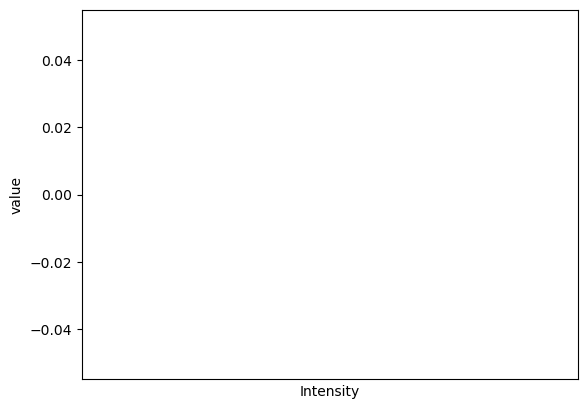

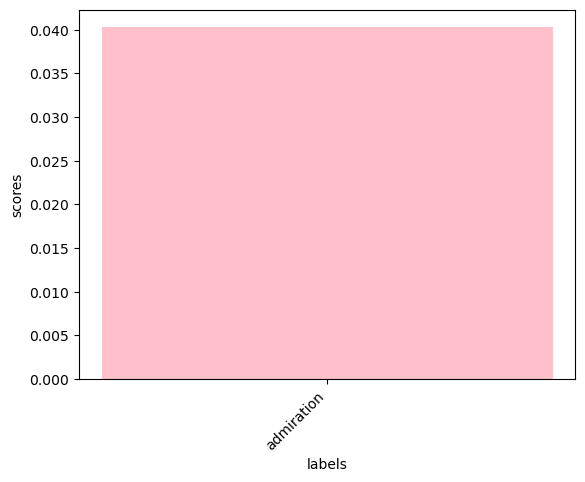

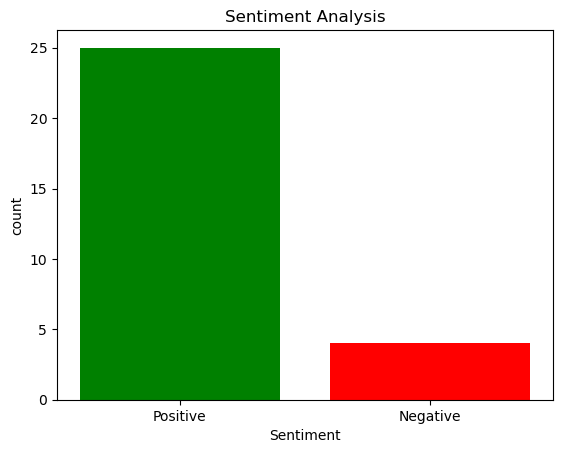

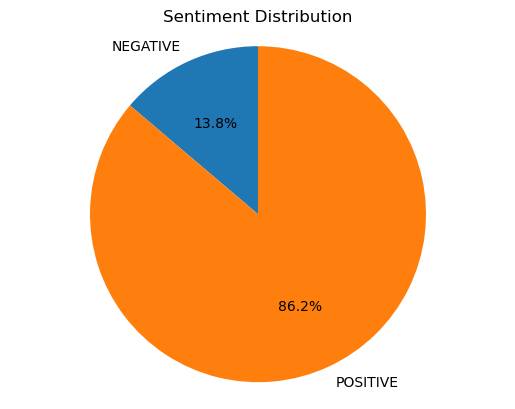

In [28]:
draw = plot(dec,e,s)